# Retail Sales Analysis

## 1. Project Overview

This project involves a comprehensive analysis of retail sales data to uncover trends, seasonal patterns, and factors influencing sales performance. By leveraging transactional and inventory data, the analysis aims to provide actionable insights for optimizing sales strategies and improving inventory management.


C:\Users\USER\AppData\Local\Temp\ipykernel_6104\3182436398.py:11: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filepath)
C:\Users\USER\AppData\Local\Temp\ipykernel_6104\3182436398.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])
C:\Users\USER\AppData\Local\Temp\ipykernel_6104\3182436398.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns='fulfilled-by', axis=1, inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_6104\3182436398.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

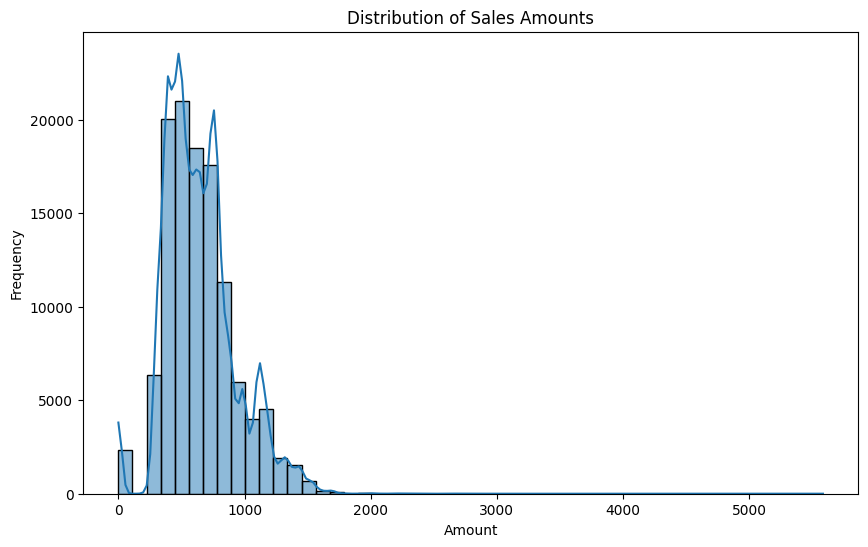

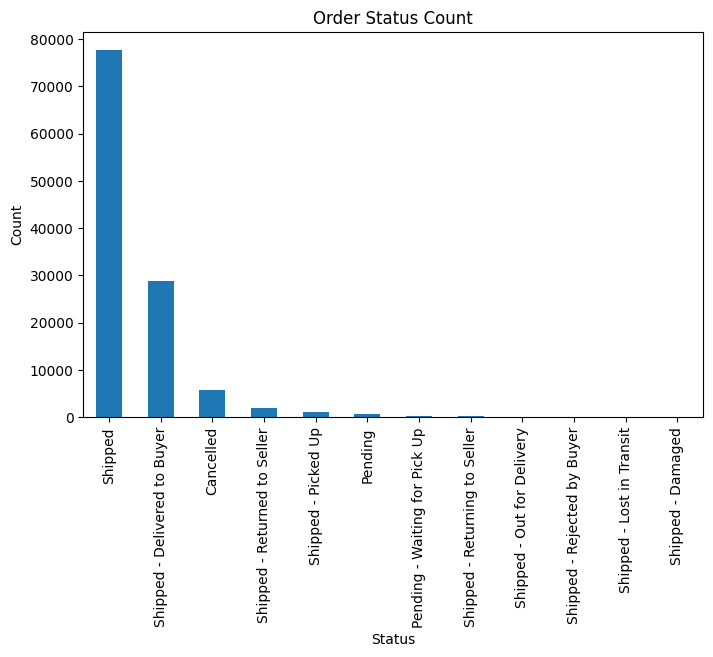

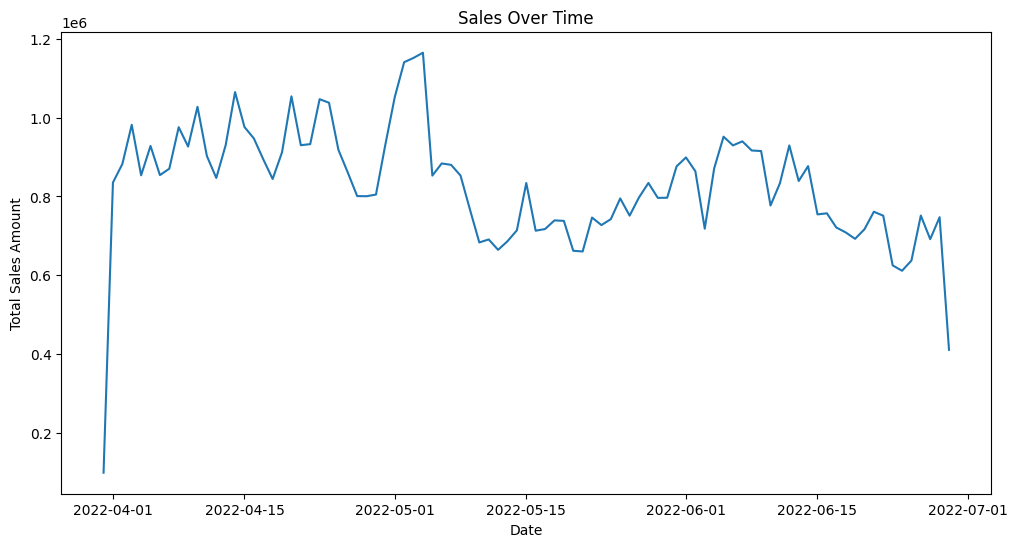

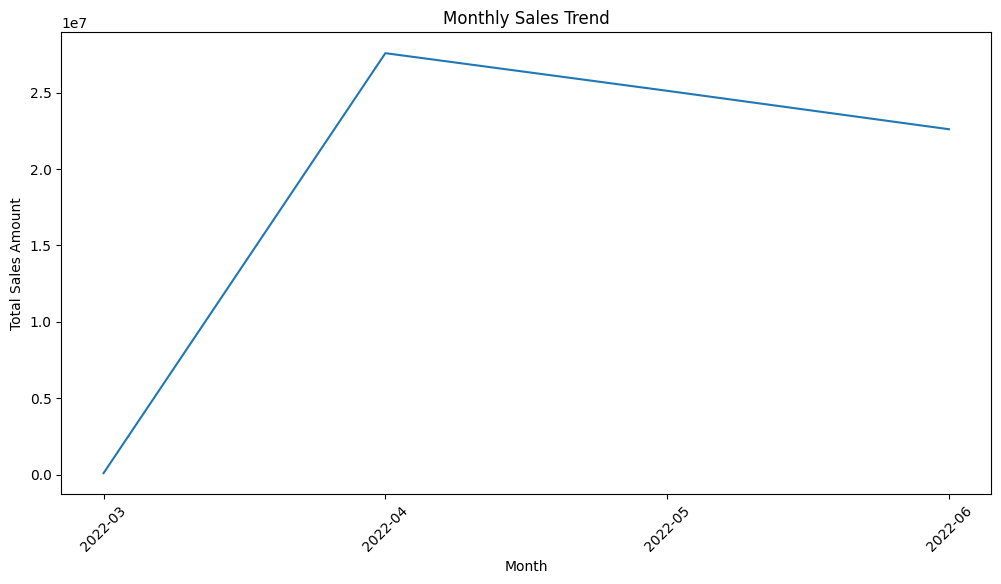

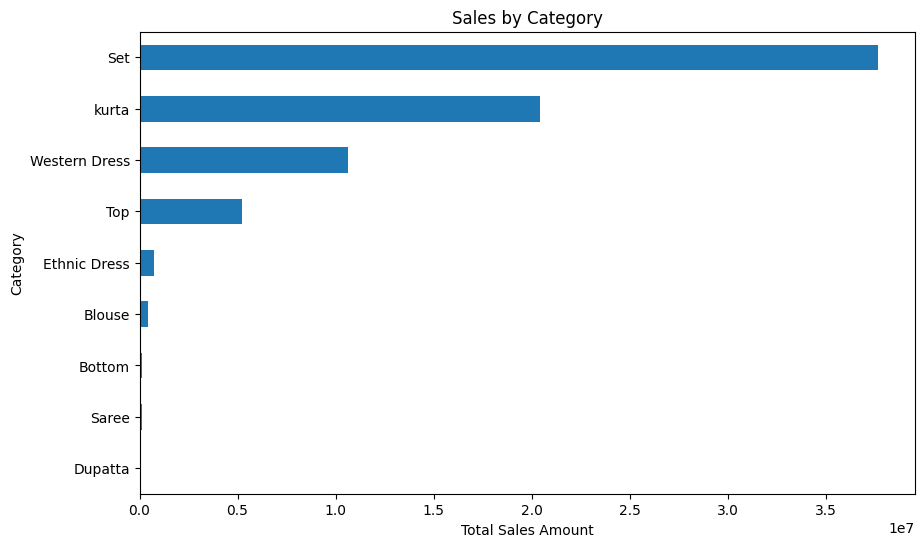

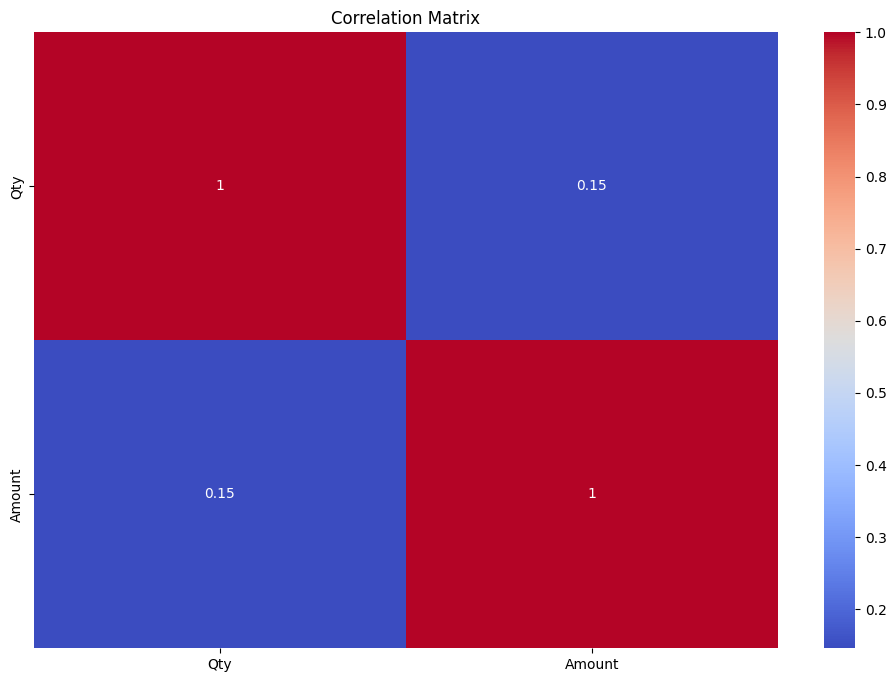

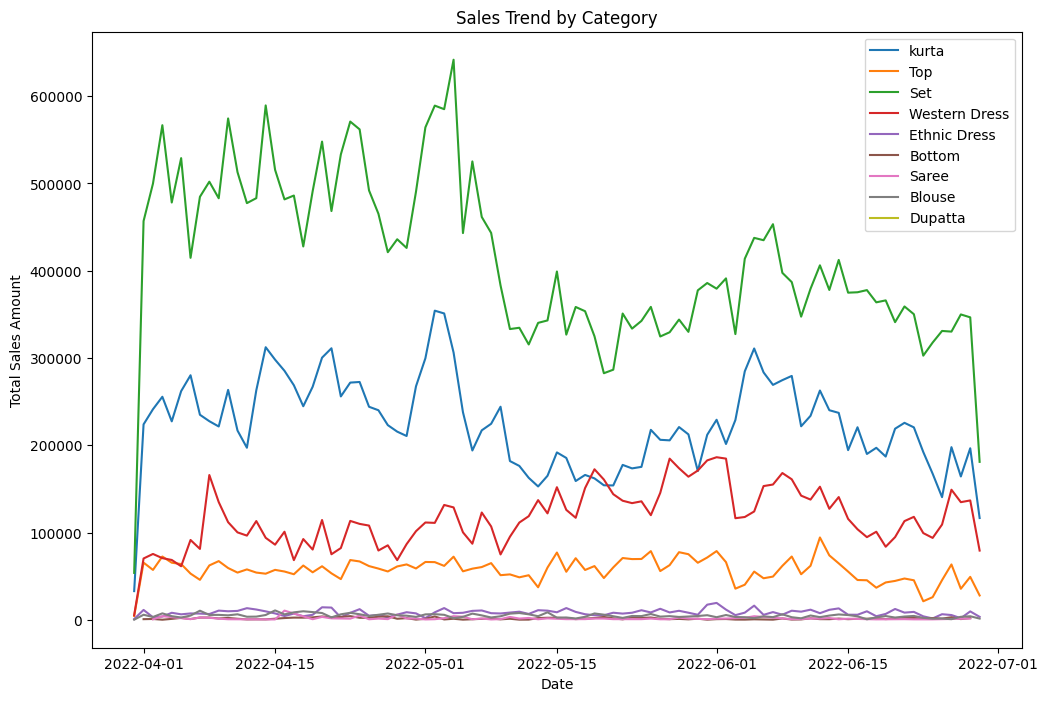

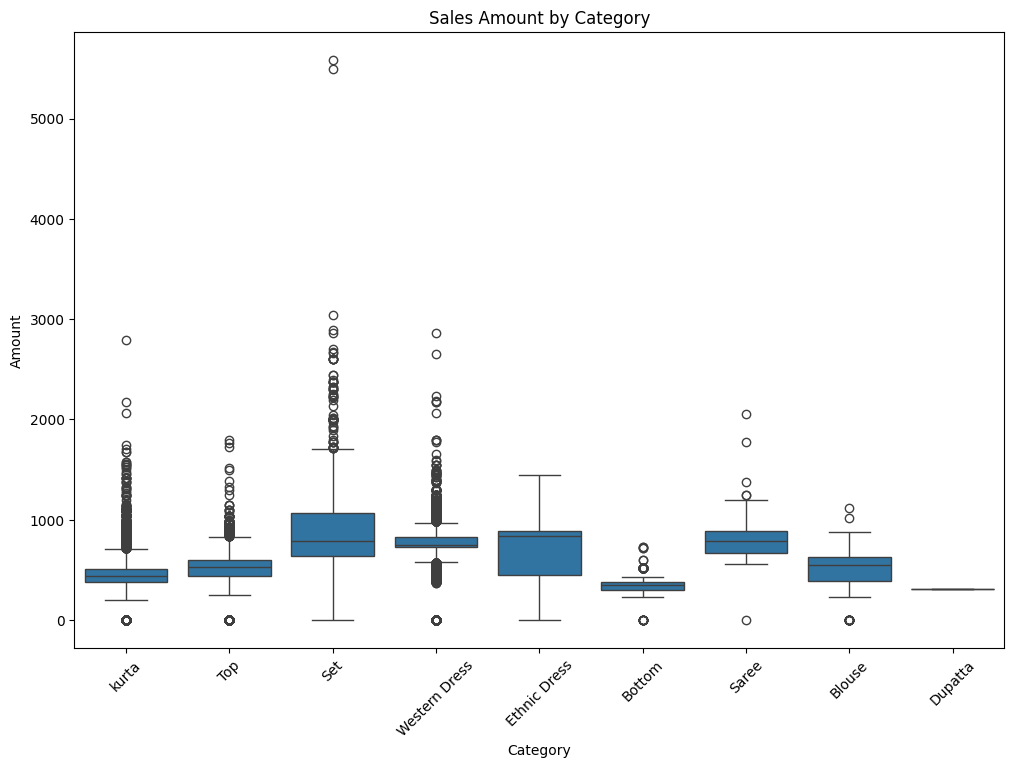

Descriptive Statistics:
count    116016.000000
mean        649.780849
std         282.648892
min           0.000000
25%         449.000000
50%         606.000000
75%         788.000000
max        5584.000000
Name: Amount, dtype: float64

Category Summary:
Category
Dupatta               915.0
Saree              118509.0
Bottom             140226.0
Blouse             434751.0
Ethnic Dress       760711.0
Top               5202753.0
Western Dress    10628361.0
kurta            20445273.0
Set              37653476.0
Name: Amount, dtype: float64


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def load_data(filepath):
    """
    Load the sales data from a CSV file and perform initial data checks.
    """
    data = pd.read_csv(filepath)
    data['Date'] = pd.to_datetime(data['Date'])
    data['ship-postal-code'] = data['ship-postal-code'].astype(object)
    data.drop(columns='Unnamed: 22', inplace=True)
    return data

def clean_data(data):
    """
    Clean the sales data by handling zero quantities, missing values, and irrelevant columns.
    """
    data = data[data['Qty'] != 0]
    data.drop(columns='fulfilled-by', axis=1, inplace=True)
    data.dropna(subset=['currency', 'Amount'], inplace=True)
    data.dropna(subset=['ship-city', 'ship-state', 'ship-postal-code', 'ship-country'], inplace=True)
    data['promotion-ids'].fillna('No Promotion', inplace=True)
    return data

def descriptive_statistics(data):
    """
    Generate summary statistics for the 'Amount' column and group by 'Category'.
    """
    stats = data['Amount'].describe()
    category_summary = data.groupby('Category')['Amount'].sum().sort_values()
    return stats, category_summary

def plot_distributions(data):
    """
    Plot distributions and counts for sales amounts and order statuses.
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(data['Amount'], bins=50, kde=True)
    plt.title('Distribution of Sales Amounts')
    plt.xlabel('Amount')
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(8, 5))
    data['Status'].value_counts().plot(kind='bar')
    plt.title('Order Status Count')
    plt.xlabel('Status')
    plt.ylabel('Count')
    plt.show()

def time_series_analysis(data):
    """
    Perform time series analysis including sales over time and monthly sales trends.
    """
    sales_time_series = data.groupby('Date')['Amount'].sum().reset_index()

    plt.figure(figsize=(12, 6))
    plt.plot(sales_time_series['Date'], sales_time_series['Amount'])
    plt.title('Sales Over Time')
    plt.xlabel('Date')
    plt.ylabel('Total Sales Amount')
    plt.show()

    data['Month'] = data['Date'].dt.to_period('M')
    monthly_sales = data.groupby('Month')['Amount'].sum().reset_index()

    plt.figure(figsize=(12, 6))
    plt.plot(monthly_sales['Month'].astype(str), monthly_sales['Amount'])
    plt.title('Monthly Sales Trend')
    plt.xlabel('Month')
    plt.ylabel('Total Sales Amount')
    plt.xticks(rotation=45)
    plt.show()

def categorical_analysis(data):
    """
    Analyze sales by product category and plot sales distribution by category.
    """
    plt.figure(figsize=(10, 6))
    data.groupby('Category')['Amount'].sum().sort_values().plot(kind='barh')
    plt.title('Sales by Category')
    plt.xlabel('Total Sales Amount')
    plt.ylabel('Category')
    plt.show()

def correlation_analysis(data):
    """
    Compute and plot the correlation matrix for numerical features in the dataset.
    """
    numerical_columns = data.select_dtypes(include='number').columns[1:]
    correlation_matrix = data[numerical_columns].corr()

    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

def trend_and_seasonal_patterns(data):
    """
    Plot sales trends and seasonal patterns by category.
    """
    plt.figure(figsize=(12, 8))
    for category in data['Category'].unique():
        category_sales = data[data['Category'] == category].groupby('Date')['Amount'].sum()
        plt.plot(category_sales.index, category_sales.values, label=category)

    plt.title('Sales Trend by Category')
    plt.xlabel('Date')
    plt.ylabel('Total Sales Amount')
    plt.legend()
    plt.show()

def visualize_sales_by_category(data):
    """
    Plot a box plot of sales amounts by category.
    """
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='Category', y='Amount', data=data)
    plt.title('Sales Amount by Category')
    plt.xticks(rotation=45)
    plt.show()

def main(filepath):
    """
    Main function to execute the retail sales analysis pipeline.
    """
    data = load_data(filepath)
    data = clean_data(data)
    stats, category_summary = descriptive_statistics(data)
    plot_distributions(data)
    time_series_analysis(data)
    categorical_analysis(data)
    correlation_analysis(data)
    trend_and_seasonal_patterns(data)
    visualize_sales_by_category(data)

    # Print summaries
    print("Descriptive Statistics:")
    print(stats)
    print("\nCategory Summary:")
    print(category_summary)

if __name__ == "__main__":
    filepath = '../data/raw/Amazon Sale Report.csv'
    main(filepath)

## 6. Conclusion

The Retail Sales Analysis provided valuable insights into the sales performance across various dimensions such as time, product categories, and promotional activities. By cleaning and processing the data, we ensured that the analysis was based on accurate and reliable information. The exploratory data analysis revealed significant trends, including peak sales periods, which can be leveraged to optimize inventory management and sales strategies. The correlation analysis highlighted key relationships between variables, providing a deeper understanding of factors influencing sales. Overall, the findings from this project can guide data-driven decisions to enhance sales performance and operational efficiency in a retail environment.